In [1]:
from collections import Counter
import pandas as pd
import re
import numpy as np

Read generated features files to pandas

In [2]:
DATA_DIR = '/Users/admin/edu/NLP/practical_NLP_course/data/'
BLOGS_PREP_EN_FILE = 'sample_all.tsv'

In [3]:
header = ['sent_cnt', 'token_cnt', 'word_cnt', 'title_cnt', 'caps_cnt', 'number_cnt', 'smiles_cnt', 'punct_cnt', 
          'uniq_cnt', 'words_len', 'big_word_cnt', 'animate_prons', 'first_person_pron', 'reflexive_prons', 
          'accent_punct', 'uncertain_word', 'filler_word', 'notional_pos', 'functional_pos', 'syllables',
          'word_freq', 'informal', 'complex_dep', 'pejorative',
          'punct_rate', 'punct_sent_rate', 'token_per_sent', 'word_rate', 'uniq_rate', 'title_rate', 'caps_rate',
          'verb_rate', 'adj_rate', 'pron_rate', 'noun_rate', 'adv_rate', 'det_rate', 'conj_rate', 'unkn_rate',
          'words_len_rate', 'big_words_rate', 'animate_rate', 'first_rate', 'reflexive_rate', 'accent_punct_rate',
          'notional_pos_rate', 'functional_pos_rate', 'syllables_rate', 'word_freq_rate', 'informal_rate',
          'complex_dep_rate', 'pejorative_rate',
          'PUNCT', 'SYM', 'X ', 'ADJ', 'VERB', 'CONJ', 'NUM', 'DET', 'ADV', 'ADP', 'NOUN', 
          'PROPN', 'PART', 'PRON', 'INTJ', 'pos_corpus', 'text',
          'age', 'label']

In [4]:
data = pd.read_csv(DATA_DIR+BLOGS_PREP_EN_FILE, encoding='utf-8', sep='\t', header=None, names=header)

In [5]:
data['func_notion_pos'] = data['functional_pos'] / data['notional_pos']
data['func_notion_pos'].fillna(0.0, inplace=True)
data['func_notion_pos'].replace([np.inf, -np.inf], [0.0, 0.0], inplace=True)

In [6]:
data['age'] = data['age'].astype(int)

In [7]:
def age_group(row):
    if row['age'] < 18:
        if row['label'][-1] == 'F':
            return '17F'
        elif row['label'][-1] == 'M':
            return '17M'
    elif row['age'] < 30:
        if row['label'][-1] == 'F':
            return '27F'
        elif row['label'][-1] == 'M':
            return '27M'
    else:
        if row['label'][-1] == 'F':
            return '47F'
        elif row['label'][-1] == 'M':
            return '47M'

In [8]:
data['Y'] = data.apply(age_group, axis=1)
data['Y'].value_counts()

27F    98978
27M    93163
17F    77203
17M    77199
47M    34792
47F    31714
Name: Y, dtype: int64

As we can see from the described data we have to normalize count columns to have better data for the input model if we are going to use Linear Models

In [9]:
pos_cols = ['PUNCT', 'SYM', 'X ', 'ADJ', 'VERB', 'CONJ', 'NUM', 'DET', 'ADV', 'ADP', 'NOUN', 
            'PROPN', 'PART', 'PRON', 'INTJ']
exclude_cols = pos_cols + ['age', 'label', 'pos_corpus', 'text', 'Y']
exclude_cols

['PUNCT',
 'SYM',
 'X ',
 'ADJ',
 'VERB',
 'CONJ',
 'NUM',
 'DET',
 'ADV',
 'ADP',
 'NOUN',
 'PROPN',
 'PART',
 'PRON',
 'INTJ',
 'age',
 'label',
 'pos_corpus',
 'text',
 'Y']

In [10]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data.drop(['age', 'label', 'Y'] , axis=1),
                                                    data['Y'],
                                                    test_size=0.25,
                                                    random_state=42)

In [11]:
X_train.head()

,sent_cnt,token_cnt,word_cnt,title_cnt,caps_cnt,number_cnt,smiles_cnt,punct_cnt,uniq_cnt,words_len,...,ADV,ADP,NOUN,PROPN,PART,PRON,INTJ,pos_corpus,text,func_notion_pos
7155,43,741,628,0,4,4,0,91,236,2351,...,81,51,92,5,27,92,3,START PRON VERB ADJ SYM ADJ END START PRON VER...,im angry/depressed i have lots o...,0.313283
82360,20,254,203,36,9,0,0,41,134,898,...,13,21,39,17,14,14,0,START PRON VERB ADJ PUNCT END START PRON VERB ...,It's late. I'm reading Chomsky's blog o...,0.362319
248528,2,47,41,5,3,0,0,6,33,149,...,5,4,9,0,2,3,0,START ADV ADP ADJ ADJ NOUN ADP NOUN PUNCT PRON...,"Just for my own sense of pride, I want ...",0.285714
258801,3,33,23,0,1,0,0,6,22,101,...,2,2,6,0,0,1,0,START X PUNCT VERB PUNCT PUNCT VERB ADJ NOUN N...,"ahahaha, guess what!!...changed m...",0.312500
173840,1,13,12,1,0,0,0,0,11,47,...,2,0,0,1,0,1,0,START VERB PROPN VERB DET ADJ ADJ ADV VERB ADV...,urlLink Ed seems a little smug here...,0.100000


#### POS vectorizing

In [12]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

# bow_pos = CountVectorizer(ngram_range=(2,2)).fit(X_train['pos_corpus'])
# print(len(bow_pos.vocabulary_))
tf_idf = TfidfVectorizer(ngram_range=(1,2)).fit(X_train['pos_corpus'])
len(tf_idf.vocabulary_)

274

In [13]:
pos_mapping = tf_idf.get_feature_names()

In [14]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score

#### Model w\o pos

In [20]:
clf_rf = RandomForestClassifier(n_estimators=1000, max_depth=12, min_samples_split=100, random_state=42, n_jobs=8)
scores_rf = cross_val_score(clf_rf, X_train.drop(exclude_cols, axis=1, errors='ignore'), y_train)
scores_rf.mean()

0.3610111183999227

#### Model only pos 2-grams

In [15]:
X_train_pos = pd.DataFrame(tf_idf.transform(X_train['pos_corpus']).todense(),
                           columns=pos_mapping, index=X_train.index)

In [16]:
X_test_pos = pd.DataFrame(tf_idf.transform(X_test['pos_corpus']).todense(),
                          columns=pos_mapping, index=X_test.index)

In [22]:
clf_rf = RandomForestClassifier(n_estimators=1000, max_depth=12, min_samples_split=100, random_state=42, n_jobs=8)
scores_rf = cross_val_score(clf_rf, X_train_pos, y_train)
scores_rf.mean()

0.3570208650699214

In [17]:
clf_rf = RandomForestClassifier(n_estimators=1000, max_depth=12, min_samples_split=100, random_state=42, n_jobs=8)
clf_rf.fit(X_train_pos, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=12, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=100,
            min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=8,
            oob_score=False, random_state=42, verbose=0, warm_start=False)

In [18]:
predictions_pos = clf_rf.predict_proba(X_train_pos)

In [19]:
X_test_pos_pred = clf_rf.predict_proba(X_test_pos)

In [20]:
clf_rf.classes_

array(['17F', '17M', '27F', '27M', '47F', '47M'], dtype=object)

In [21]:
train_pos_pred = pd.DataFrame(predictions_pos,
                              columns=['17F_pos', '17M_pos', '25F_pos', '25M_pos', '48F_pos', '48M_pos'],
                              index=X_train.index)

In [22]:
test_pos_pred = pd.DataFrame(X_test_pos_pred,
                             columns=['17F_pos', '17M_pos', '27F_pos', '27M_pos', '47F_pos', '47M_pos'],
                             index=X_test.index)

#### Model only unigrams

In [23]:
tf_idf_uni = TfidfVectorizer(min_df=0.005).fit(X_train['text'])
uni_mapping = tf_idf_uni.get_feature_names()
len(tf_idf_uni.vocabulary_)

2674

In [24]:
X_train_uni = pd.DataFrame(tf_idf_uni.transform(X_train['text']).todense(),
                           columns=uni_mapping, index=X_train.index)

In [25]:
X_test_uni = pd.DataFrame(tf_idf_uni.transform(X_test['text']).todense(),
                           columns=uni_mapping, index=X_test.index)

In [26]:
X_train_uni.shape

(309786, 2674)

In [29]:
clf_rf_uni = RandomForestClassifier(n_estimators=1000, max_depth=12, min_samples_split=100, random_state=42, n_jobs=8)
scores_rf = cross_val_score(clf_rf_uni, X_train_uni, y_train)
scores_rf.mean()

0.3643750590943384

In [27]:
clf_rf_uni = RandomForestClassifier(n_estimators=1000, max_depth=12, min_samples_split=100, random_state=42, n_jobs=8)
clf_rf_uni.fit(X_train_uni, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=12, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=100,
            min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=8,
            oob_score=False, random_state=42, verbose=0, warm_start=False)

In [28]:
predictions_uni = clf_rf_uni.predict_proba(X_train_uni)

test_predictions_uni = clf_rf_uni.predict_proba(X_test_uni)

In [29]:
clf_rf_uni.classes_

array(['17F', '17M', '27F', '27M', '47F', '47M'], dtype=object)

In [30]:
train_uni_pred = pd.DataFrame(predictions_uni,
                              columns=['17F_uni', '17M_uni', '25F_uni', '25M_uni', '48F_uni', '48M_uni'],
                              index=X_train.index)

In [31]:
test_uni_pred = pd.DataFrame(test_predictions_uni,
                             columns=['17F_uni', '17M_uni', '27F_uni', '27M_uni', '47F_uni', '47M_uni'],
                             index=X_test.index)

#### Add pos vect to the model

In [32]:
# X_train_pr = pd.concat([X_train.drop(['pos_corpus', 'text'], axis=1), train_pos_pred], axis=1, join="inner")
X_train_pr = pd.concat([X_train.drop(exclude_cols, axis=1, errors='ignore'), train_pos_pred], axis=1, join="inner")
X_train_pr.shape

(309786, 59)

In [38]:
clf_rf_pos = RandomForestClassifier(n_estimators=1000, max_depth=12, min_samples_split=100, random_state=42, n_jobs=8)
scores_rf = cross_val_score(clf_rf_pos, X_train_pr, y_train)
scores_rf.mean()

0.49737697103851747

#### Add uni vect to the model

In [33]:
X_train_uni_pr = pd.concat([X_train_pr, train_uni_pred], axis=1, join="inner")
X_train_uni_pr.shape

(309786, 65)

In [40]:
clf_rf_uni = RandomForestClassifier(n_estimators=1000, max_depth=12, min_samples_split=100, random_state=42, n_jobs=6)
scores_rf2 = cross_val_score(clf_rf_uni, X_train_uni, y_train)
scores_rf2.mean()

0.5157785966641901

In [60]:
clf_rf_uni = RandomForestClassifier(n_estimators=1000, max_depth=18, min_samples_split=3, random_state=42, n_jobs=6)
clf_rf_uni.fit(X_train_uni_pr, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=18, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=3,
            min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=6,
            oob_score=False, random_state=42, verbose=0, warm_start=False)

### Test

In [59]:
X_test_all.shape

(103263, 65)

In [36]:
# X_test_features = X_test.drop(['pos_corpus', 'text'], axis=1)
X_test_all = pd.concat([X_test.drop(exclude_cols, axis=1, errors='ignore'), test_pos_pred, test_uni_pred],
                       axis=1, 
                       join="inner")

In [61]:
predictions_rf = clf_rf_uni.predict(X_test_all)

In [62]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, precision_recall_fscore_support, f1_score, roc_auc_score, roc_curve, auc

In [63]:
pd.DataFrame({'y_test': y_test, 'preds': predictions_rf}).head(10)

,preds,y_test
43576,17M,27F
320170,27F,47F
258827,27M,17M
274995,47M,27M
373046,27F,27F
160163,27M,27M
176029,27M,27M
394581,27M,27M
358779,27F,47M
235555,17M,17M


In [64]:
print('Accuracy:', accuracy_score(y_test, predictions_rf))
print()
print('Precision weighted:', precision_score(y_test, predictions_rf, average='weighted'))
print('Recall weighted:', recall_score(y_test, predictions_rf, average='weighted'))
print('F1 score weighted:', f1_score(y_test, predictions_rf, average='weighted'))
print()
print('Precision macro:', precision_score(y_test, predictions_rf, average='macro'))
print('Recall macro:', recall_score(y_test, predictions_rf, average='macro'))
print('F1 score macro:', f1_score(y_test, predictions_rf, average='macro'))

Accuracy: 0.4097692300243069

Precision weighted: 0.4093272214587101
Recall weighted: 0.4097692300243069
F1 score weighted: 0.39052816585772593

Precision macro: 0.403536030692528
Recall macro: 0.3421790669795714
F1 score macro: 0.3405916942529408


In [65]:
labels = ['17F', '17M', '27F', '27M', '47F', '47M']
# labels = ['17', '27', '47']
conf_matrix_temp = confusion_matrix(y_test, predictions_rf, labels=labels)
conf_matrix_rf = pd.DataFrame(conf_matrix_temp, columns=labels, index=labels)

In [66]:
conf_matrix_rf

,17F,17M,27F,27M,47F,47M
17F,10351,3147,3799,1808,40,77
17M,4617,6181,3736,4405,74,256
27F,3009,1969,12706,6325,287,416
27M,1416,2290,6971,11473,182,981
47F,528,458,3716,2447,456,314
47M,272,445,2285,4483,196,1147


In [67]:
supp_matrix_temp = [list(x) for x in precision_recall_fscore_support(y_test, predictions_rf, labels=labels)]
supp_matrix_rf = pd.DataFrame(supp_matrix_temp,
                              columns=labels, 
                              index=['precision', 'recall', 'f1', 'total'])

In [68]:
supp_matrix_rf

,17F,17M,27F,27M,47F,47M
precision,0.512603,0.426570,0.382561,0.370802,0.369231,0.359448
recall,0.538498,0.320774,0.514163,0.492129,0.057583,0.129928
f1,0.525232,0.366184,0.438705,0.422937,0.099629,0.190864
total,19222.000000,19269.000000,24712.000000,23313.000000,7919.000000,8828.000000


In [69]:
from sklearn.preprocessing import label_binarize

y_bin = label_binarize(y_test, classes=labels)
y_pr_bin = label_binarize(predictions_rf, classes=labels)


# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(6):
    fpr[i], tpr[i], _ = roc_curve(y_bin[:, i], y_pr_bin[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_bin.ravel(), y_pr_bin.ravel(), pos_label=2)
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/metrics/ranking.py:571: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  UndefinedMetricWarning)


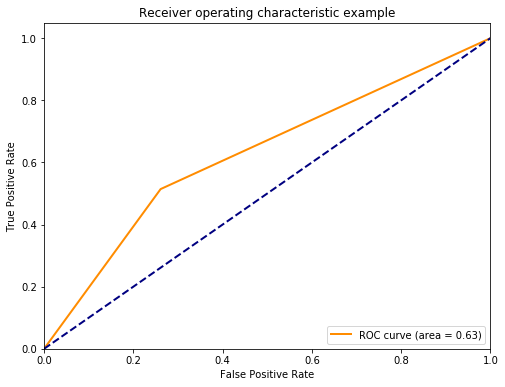

In [70]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
lw = 2
plt.plot(fpr[2], tpr[2], color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc[2])
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

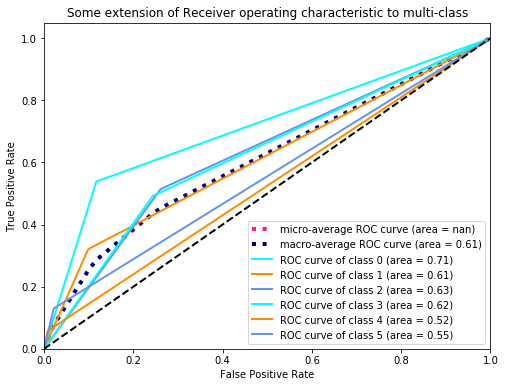

In [71]:
import numpy as np
from scipy import interp
from itertools import cycle

n_classes = 6

# Compute macro-average ROC curve and ROC area

# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure(figsize=(8, 6))
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Some extension of Receiver operating characteristic to multi-class')
plt.legend(loc="lower right")
plt.show()

In [72]:
importances = clf_rf_uni.feature_importances_

In [74]:
std = np.std([tree.feature_importances_ for tree in clf_rf_uni.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

In [80]:
columns = list(X_train_uni_pr.columns)

In [89]:
[columns[x] for x in indices]

['17M_pos',
 '25M_pos',
 '17M_uni',
 '25F_pos',
 '17F_pos',
 '17F_uni',
 '25F_uni',
 '48F_pos',
 '48M_pos',
 '48F_uni',
 '25M_uni',
 '48M_uni',
 'pron_rate',
 'noun_rate',
 'det_rate',
 'words_len_rate',
 'token_per_sent',
 'title_rate',
 'word_freq_rate',
 'big_words_rate',
 'syllables_rate',
 'verb_rate',
 'word_rate',
 'uniq_rate',
 'functional_pos_rate',
 'conj_rate',
 'adv_rate',
 'punct_rate',
 'adj_rate',
 'notional_pos_rate',
 'word_freq',
 'func_notion_pos',
 'accent_punct_rate',
 'complex_dep_rate',
 'punct_sent_rate',
 'caps_rate',
 'words_len',
 'title_cnt',
 'syllables',
 'uniq_cnt',
 'animate_rate',
 'first_rate',
 'token_cnt',
 'word_cnt',
 'notional_pos',
 'first_person_pron',
 'animate_prons',
 'functional_pos',
 'big_word_cnt',
 'punct_cnt',
 'accent_punct',
 'caps_cnt',
 'complex_dep',
 'sent_cnt',
 'filler_word',
 'pejorative_rate',
 'number_cnt',
 'unkn_rate',
 'reflexive_rate',
 'informal_rate',
 'pejorative',
 'uncertain_word',
 'informal',
 'reflexive_prons',
 '

In [84]:

# Print the feature ranking
print("Feature ranking:")

for f in range(X_train_uni_pr.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

Feature ranking:
1. feature 54 (0.063600)
2. feature 56 (0.061007)
3. feature 60 (0.055460)
4. feature 55 (0.053828)
5. feature 53 (0.048144)
6. feature 59 (0.048024)
7. feature 61 (0.044807)
8. feature 57 (0.044015)
9. feature 58 (0.039953)
10. feature 63 (0.039399)
11. feature 62 (0.039277)
12. feature 64 (0.027295)
13. feature 33 (0.016911)
14. feature 34 (0.013408)
15. feature 36 (0.013193)
16. feature 39 (0.012527)
17. feature 26 (0.012484)
18. feature 29 (0.012351)
19. feature 48 (0.012294)
20. feature 40 (0.011640)
21. feature 47 (0.011635)
22. feature 31 (0.011497)
23. feature 27 (0.010852)
24. feature 28 (0.010811)
25. feature 46 (0.010697)
26. feature 37 (0.010640)
27. feature 35 (0.010480)
28. feature 24 (0.010445)
29. feature 32 (0.010344)
30. feature 45 (0.010205)
31. feature 20 (0.010072)
32. feature 52 (0.009982)
33. feature 44 (0.009507)
34. feature 50 (0.009490)
35. feature 25 (0.009481)
36. feature 30 (0.009228)
37. feature 9 (0.008602)
38. feature 3 (0.008545)
39. fe

### Other Ideas

Separate prediction of gender and age

In [110]:
y_train_age = y_train.str.slice(0,2)
y_train_gen = y_train.str.slice(-1)

y_test_age = y_test.str.slice(0,2)
y_test_gen = y_test.str.slice(-1)

In [115]:
clf_rf_age = RandomForestClassifier(n_estimators=1000, max_depth=12, min_samples_split=100, random_state=42, n_jobs=6)
clf_rf_age.fit(X_train_uni_pr, y_train_age)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=12, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=100,
            min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=6,
            oob_score=False, random_state=42, verbose=0, warm_start=False)

In [116]:
clf_rf_gen = RandomForestClassifier(n_estimators=1000, max_depth=12, min_samples_split=100, random_state=42, n_jobs=6)
clf_rf_gen.fit(X_train_uni_pr, y_train_gen)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=12, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=100,
            min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=6,
            oob_score=False, random_state=42, verbose=0, warm_start=False)

In [121]:
pred_age = clf_rf_age.predict(X_test_all)
pred_gen = clf_rf_gen.predict(X_test_all)
pred_age_gen = pred_age + pred_gen

In [122]:
pd.DataFrame({'y_test': y_test, 'preds': pred_age_gen}).head(15)

,preds,y_test
3157,27M,27F
353190,27F,17F
389333,27M,47M
132350,27M,17M
407384,17F,17F
310543,27F,47M
402626,17M,17F
266429,17F,27F
189039,17F,47M
80838,17M,27M


In [123]:
print('Accuracy:', accuracy_score(y_test, pred_age_gen))
print()
print('Precision weighted:', precision_score(y_test, pred_age_gen, average='weighted'))
print('Recall weighted:', recall_score(y_test, pred_age_gen, average='weighted'))
print('F1 score weighted:', f1_score(y_test, pred_age_gen, average='weighted'))
print()
print('Precision macro:', precision_score(y_test, pred_age_gen, average='macro'))
print('Recall macro:', recall_score(y_test, pred_age_gen, average='macro'))
print('F1 score macro:', f1_score(y_test, pred_age_gen, average='macro'))

Accuracy: 0.4022972920621392

Precision weighted: 0.4227483887635134
Recall weighted: 0.4022972920621392
F1 score weighted: 0.3722055411456491

Precision macro: 0.43650615352695205
Recall macro: 0.3260688523448488
F1 score macro: 0.312842671249971


In [124]:
conf_matrix_temp = confusion_matrix(y_test, pred_age_gen, labels=labels)
conf_matrix_ag = pd.DataFrame(conf_matrix_temp, columns=labels, index=labels)
conf_matrix_ag

,17F,17M,27F,27M,47F,47M
17F,10582,2701,3599,2336,14,35
17M,5247,4953,3355,5670,11,119
27F,3353,1304,11864,8082,48,191
27M,1643,1580,6026,13302,38,514
47F,565,232,3670,3074,193,203
47M,284,241,1903,5638,38,644


In [125]:
conf_matrix_rf

,17F,17M,27F,27M,47F,47M
17F,10044,3030,4089,2041,10,53
17M,4413,5749,4127,4885,30,151
27F,2904,1722,13010,6867,89,250
27M,1321,1987,7099,11981,58,657
47F,484,345,3968,2662,250,228
47M,226,325,2276,5061,59,801


In [126]:
supp_matrix_temp = [list(x) for x in precision_recall_fscore_support(y_test, pred_age_gen, labels=labels)]
supp_matrix_ag = pd.DataFrame(supp_matrix_temp,
                              columns=labels, 
                              index=['precision', 'recall', 'f1', 'total'])
supp_matrix_ag

,17F,17M,27F,27M,47F,47M
precision,0.488235,0.449823,0.390045,0.349116,0.564327,0.377491
recall,0.549229,0.255903,0.477578,0.575769,0.024316,0.073617
f1,0.516939,0.326220,0.429396,0.434670,0.046624,0.123206
total,19267.000000,19355.000000,24842.000000,23103.000000,7937.000000,8748.000000


In [127]:
supp_matrix_lr

,17F,17M,27F,27M,47F,47M
precision,0.517946,0.436921,0.376349,0.357674,0.504032,0.374299
recall,0.521306,0.297029,0.523710,0.518591,0.031498,0.091564
f1,0.519620,0.353643,0.437966,0.423357,0.059291,0.147134
total,19267.000000,19355.000000,24842.000000,23103.000000,7937.000000,8748.000000


### Balance data

In [37]:
y_train.value_counts()

27F    74266
27M    69850
17F    57981
17M    57930
47M    25964
47F    23795
Name: Y, dtype: int64

In [38]:
# y_train.groupby('Y').cumcount()
y_train_c = pd.DataFrame(y_train)
y_train_c['cum'] = y_train_c.groupby('Y').cumcount()
y_train_cut = y_train_c[y_train_c['cum'] < 27000]
# y_train_cut.drop('cum', axis=1, inplace=True)

In [39]:
y_train_cut = y_train_cut['Y']

In [40]:
y_train_cut.value_counts()

17F    27000
27F    27000
17M    27000
27M    27000
47M    25964
47F    23795
Name: Y, dtype: int64

In [41]:
X_train_cut = X_train_uni_pr.loc[y_train_cut.index]

In [42]:
clf_rf_cut = RandomForestClassifier(n_estimators=1000, random_state=42, n_jobs=8)

In [44]:
from sklearn.model_selection import GridSearchCV

param_grid = {
                 'max_depth': [9, 18],
                 'min_samples_split': [3, 5, 10, 50]
             }

grid_clf = GridSearchCV(clf_rf_cut, param_grid, cv=4)
grid_clf.fit(X_train_cut, y_train_cut)

GridSearchCV(cv=4, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=8,
            oob_score=False, random_state=42, verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'max_depth': [9, 18], 'min_samples_split': [3, 5, 10, 50]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [45]:
grid_clf.best_params_

{'max_depth': 18, 'min_samples_split': 3}

In [47]:
clf_rf_cut = RandomForestClassifier(n_estimators=1000, max_depth=18, min_samples_split=3, random_state=42, n_jobs=8)
clf_rf_cut.fit(X_train_cut, y_train_cut)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=18, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=3,
            min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=8,
            oob_score=False, random_state=42, verbose=0, warm_start=False)

In [48]:
predictions_cut = clf_rf_cut.predict(X_test_all)

In [50]:
print('Accuracy:', accuracy_score(y_test, predictions_cut))
print()
print('Precision weighted:', precision_score(y_test, predictions_cut, average='weighted'))
print('Recall weighted:', recall_score(y_test, predictions_cut, average='weighted'))
print('F1 score weighted:', f1_score(y_test, predictions_cut, average='weighted'))
print()
print('Precision macro:', precision_score(y_test, predictions_cut, average='macro'))
print('Recall macro:', recall_score(y_test, predictions_cut, average='macro'))
print('F1 score macro:', f1_score(y_test, predictions_cut, average='macro'))

Accuracy: 0.3762238168559891

Precision weighted: 0.39186418829597147
Recall weighted: 0.3762238168559891
F1 score weighted: 0.377883512199024

Precision macro: 0.35825699424965074
Recall macro: 0.37543540034123274
F1 score macro: 0.35847739672333184


In [51]:
labels = ['17F', '17M', '27F', '27M', '47F', '47M']
# labels = ['17', '27', '47']
conf_matrix_temp = confusion_matrix(y_test, predictions_cut, labels=labels)
conf_matrix_cut = pd.DataFrame(conf_matrix_temp, columns=labels, index=labels)
conf_matrix_cut

,17F,17M,27F,27M,47F,47M
17F,10735,3505,2434,1072,696,780
17M,4839,6733,2289,2641,902,1865
27F,3459,2474,8720,3656,3186,3217
27M,1647,2801,4403,6689,2130,5643
47F,585,554,1892,1140,2179,1569
47M,316,529,1137,1974,1078,3794


In [53]:
supp_matrix_temp = [list(x) for x in precision_recall_fscore_support(y_test, predictions_cut, labels=labels)]
supp_matrix_cut = pd.DataFrame(supp_matrix_temp,
                              columns=labels, 
                              index=['precision', 'recall', 'f1', 'total'])
supp_matrix_cut

,17F,17M,27F,27M,47F,47M
precision,0.497428,0.405700,0.417725,0.389529,0.214237,0.224923
recall,0.558475,0.349421,0.352865,0.286921,0.275161,0.429769
f1,0.526187,0.375464,0.382565,0.330443,0.240907,0.295299
total,19222.000000,19269.000000,24712.000000,23313.000000,7919.000000,8828.000000


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/metrics/ranking.py:571: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  UndefinedMetricWarning)


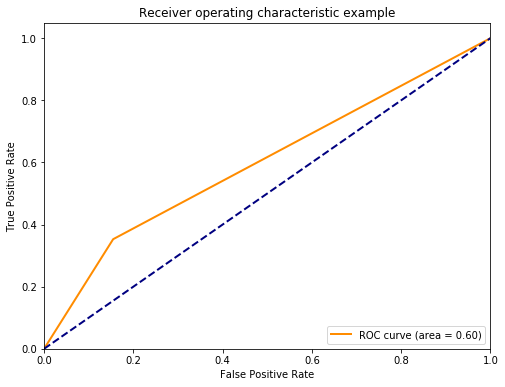

In [55]:
from sklearn.preprocessing import label_binarize

y_bin = label_binarize(y_test, classes=labels)
y_pr_bin = label_binarize(predictions_cut, classes=labels)


# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(6):
    fpr[i], tpr[i], _ = roc_curve(y_bin[:, i], y_pr_bin[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_bin.ravel(), y_pr_bin.ravel(), pos_label=2)
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

#####

import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
lw = 2
plt.plot(fpr[2], tpr[2], color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc[2])
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

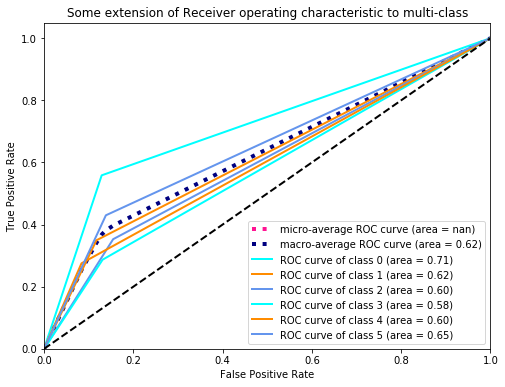

In [58]:
import numpy as np
from scipy import interp
from itertools import cycle

n_classes = 6

# Compute macro-average ROC curve and ROC area

# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure(figsize=(8, 6))
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Some extension of Receiver operating characteristic to multi-class')
plt.legend(loc="lower right")
plt.show()

## Make predictions

In [ ]:
import spacy, en_core_web_sm
import prep_for_pred as pf

nlp = en_core_web_sm.load()
lemmas_set = pf.make_lemma_set('lemmas.txt')

In [ ]:
def predict_by_text(text):
    row_data = pf.prepare(text, nlp, lemmas_set)
    row_df = pd.DataFrame(row_data).T
    row_df.columns = header[:71]
    row_df['func_notion_pos'] = row_df['functional_pos'] / row_df['notional_pos']
    row_df['func_notion_pos'].fillna(0.0, inplace=True)
    row_df['func_notion_pos'].replace([np.inf, -np.inf], [0.0, 0.0], inplace=True)
    pred_pos = pd.DataFrame(tf_idf.transform(row_df['pos_corpus']).todense(), columns=pos_mapping)
    preds_pos = pd.DataFrame(clf_rf.predict_proba(pred_pos), 
                         columns=['17F_pos', '17M_pos', '25F_pos', '25M_pos', '48F_pos', '48M_pos'])
    pred_uni = pd.DataFrame(tf_idf_uni.transform(row_df['text']).todense(), columns=uni_mapping)
    # pred_bi = pd.DataFrame(tf_idf_bi.transform(X_train['text']).todense(), columns=bi_mapping)
    preds_uni = pd.DataFrame(clf_rf_uni.predict_proba(pred_uni),
                         columns=['17F_uni', '17M_uni', '25F_uni', '25M_uni', '48F_uni', '48M_uni'])                   
    # preds_bi = pd.DataFrame(clf_rf_bi.predict_proba(pred_bi),
    #               columns=['17F_bi', '17M_bi', '25F_bi', '25M_bi', '48F_bi', '48M_bi'])
    return clf_rf_uni_all.predict(pd.concat([row_df.drop(exclude_cols, axis=1, errors='ignore'), 
                                             preds_pos, preds_uni], axis=1))[0]

In [ ]:
test_text = "I just watched an interview of ex-NJ Gov. Chris Christie by David Axelrod at the IOP at the U. of Chicago by C-Span 1. Christie attributes Trump's 2016 win as being like Obama's 2008 win as being both 'outsiders' to Washington. Christie himself declined to run in 2012 because he only had 16 months experience as governor, whereas few people in the electorate cared about that. Trump played media leaders by his wild controversies generating ratings and got disproportionate coverage for that. Christie thinks Mueller's probe is solid and objective, not overly long and keeps getting extended by Trump's resistance. Christie thinks the Dems will need to nominate someone from outside D.C. to beat Trump in 2020, maybe a newly elected Dem Governor, experience not being important. (Rhetorical skills, platform presence and media positioning obviously being important.) Christie thinks the Mueller investigation will continue even if Sessions and Rosenstein get fired. He doesn't think impeach talk is productive for Democrats."

In [ ]:
predict_by_text(test_text)